<a href="https://colab.research.google.com/github/Jonida-Zekaj/EMNIST-Image_Classifier/blob/main/IMAGE_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING NECESSARY LIBRARIES FOR THE DATASET**

---

Dataset used : EMNIST Dataset

Content : Letters in different fonts

[MNIST Datasets](https://www.nist.gov/itl/products-and-services/emnist-dataset)

**EMNIST dataset** is an extended version of the orignal MNIST dataset. In addition to its original contents, the EMNIST includes special characters and lower and upper handwritten letters.

In [ ]:
pip install emnist      #installs the EMNIST python package...in google colab it is preinstalled

In [ ]:
# Importing Pytorch -- library used to build and train CNNs.
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchsummary import summary

# Importing torchvision -- library in Pytorch necessary when working with image or/and video data.
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Importing MAplotlib -- used for visualising sample images of a dataset.
import matplotlib.pyplot as plt

# Check versions
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")


PyTorch version: 2.6.0+cu124
torchvision version: 0.21.0+cu124


#1

" import torch" --- The PyTorch library

" import nn " --- Modules for building the CNN.

" import DataLoader " --- It loads the EMNSITS dataset during the training and testing phase.

#2

" torchvision " --- PyTorch library designed for computer vision tasks.

" import datasets " --- Import the datasets from torchvision (e.g. EMNIST Dataset).

" import traforms " --- Module that provides image transformations.

" import ToTensor " --- Transformation that converts a NumPy array to a PyTorch tensor.

#3
" matplotlib " --- Python library that creates visual content such as graphs, plots, charts etc.


#4
Print of the PyTorch version and its sublibraries.


# **LOADING THE EMNIST LETTERS DATASET**


---

Part One : Training Dataset

Part Two : Testing Dataset

Part Three : Displaying the Details



In [ ]:
# LOADING THE EMNIST LETTERS TRAINNING SET
train_dataset=datasets.EMNIST(
    root="data",
    split="letters",
    train=True,
    download=True,
    transform=ToTensor(),
)
# LOADING THE EMNIST LETTERS TEST SET
test_dataset= datasets.EMNIST(
    root="data",
    split="letters",
    train= False,
    download=True,
    transform=ToTensor()
)
# PRINTING DATASET SPECIFICATIONS
print(f" Training set size : {len(train_dataset)} images")
print(f" Test set size : {len(test_dataset)} images")

 Training set size : 124800 images
 Test set size : 20800 images


**PART ONE:**

This section of code loads the EMNIST dataset for training.

" root= data "  --- Stores the dataset in a folder named "data".

" split= letters " --- Specifies that only the EMNIST letters subset of the whole dataset is loaded.

" train= True " --- Loads the traing set

"download= True" --- It downloads the dataset if it is not already present in the created directory "data".

" tansform= transform " --- Applies the trainsformation to each image in the dataset.
<br><br>
**PART TWO:**

" train= False " --- Loads the test set.
<br><br>
**PART THREE:**

" {len(test_dataset)} " --- Returns the number of images in the test set.

" print(...) " --- Prints the text and the returned values.



#**DISPLAYING IMAGES AND ITS LABELS**


---

It is an important process that helps visualize the elements of the dataset while also checking the correctenss of the label based on the presented picture.

Keep in mind that the EMNIST and MNIST dataset have predefined corresponding label to each image.

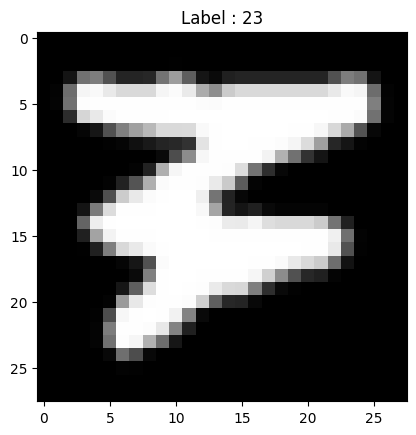

Image Shape : torch.Size([1, 28, 28])


In [ ]:
import matplotlib.pyplot as plt
image,label=train_dataset[0]     # Take an image and its label
plt.imshow(image.squeeze(), cmap="gray")  # Visualize the selected letter as an image
plt.title(f"Label : {label}")   # Show the image's lable (number)
plt.show()
print(f"Image Shape : {image.shape}")  # (colour channels, height, width)


The previous code retrieves an image from the dataset.

More specifically the first image as shown through the snipet "train_dataset[0]".

After selecting an image from the dataset it visually shows it using the library "matplotlib".

In addition, to the image it also output its respective lable (identification) and the shape of image tensor.

As a default the lable is set to show a identifying number rather than a letter.


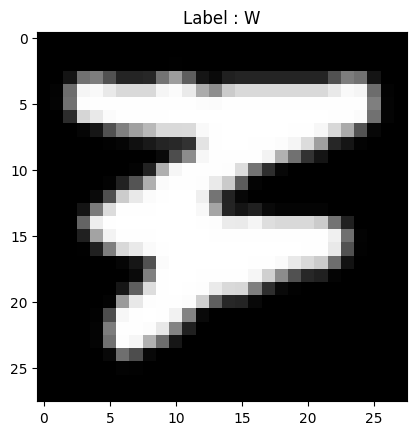

Image Shape : torch.Size([1, 28, 28])


In [ ]:
import string
import matplotlib.pyplot as plt

image, label= train_dataset[0]
letter_label=string.ascii_uppercase[label-1] # Numeric label --> letter
plt.imshow(image.squeeze(), cmap="gray")  # Visualize the selected letter as an image
plt.title(f"Label : {letter_label}")   # Show the image's lable (number)
plt.show()
print(f"Image Shape : {image.shape}")  # (colour channels, height, width)

#**DATA PREPARATION BEFORE CNN**


---



In [ ]:
import torch
from torch.utils.data import ConcatDataset, DataLoader, random_split
from torchvision import transforms, datasets


# LOADING THE EMNIST LETTERS TRAINNING SET
train_dataset=datasets.EMNIST(
    root="data",
    split="letters",
    train=True,
    download=True,
    transform=ToTensor(),
)
# LOADING THE EMNIST LETTERS TEST SET
test_dataset= datasets.EMNIST(
    root="data",
    split="letters",
    train= False,
    download=True,
    transform=ToTensor()
)
# CALCULATING MEAN AND STD FOR NOMALIZATION OF EMNIST LETTERS DATASET
def calc_mean_std(dataset):
  loader=DataLoader(dataset, batch_size=1000, shuffle=True)
  mean=0.0
  std=0.0
  total_samples=0
  for images,_ in loader:
    batch_samples=images.size(0)
    images = images.view(batch_samples, -1)  # Flatten the images
    mean +=images.mean(dim=1).sum().item()  # Mean per channel
    std +=images.std(dim=1).sum().item()  # Std per channel
    total_samples +=batch_samples
  mean/=total_samples
  std /=total_samples
  return mean, std
mean, std= calc_mean_std(train_dataset)
print("FOR EMNIST LETTERS DATASET")
print(f"Mean : {mean}")
print(f"Standard Deviation : {std}")

# TRANSFORMATION APPLIED TO TRAIN AND TEST DATASET
train_transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((mean,),(std,))
])
# TRANFORMATIONS APPLIED TO AUGMENTED DATASET
augmented_transform = transforms.Compose([
    transforms.RandomRotation(degrees=90),  # Random rotation
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # Random translation
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize((mean,), (std,))  # Normalize pixel values (mean, std)
])

# RELOAD THE DATASETS
train_dataset=datasets.EMNIST(
    root="data",
    split="letters",
    train=True,
    download=True,
    transform=train_transform
)
test_dataset= datasets.EMNIST(
    root="data",
    split="letters",
    train= False,
    download=True,
    transform=train_transform
)
augmented_dataset= datasets.EMNIST(
    root="data",
    split="letters",
    train= True,
    download=True,
    transform=augmented_transform
)

# COMBINE THE DATASETS (TRAIN & AUGMENTED)
combined_dataset = ConcatDataset([train_dataset, augmented_dataset])
train_size=int(0.8*len(combined_dataset))  # 80% training dataset
validation_size= len(combined_dataset)-train_size  # 20% testing dataset
train_dataset, validation_dataset=random_split(combined_dataset,[train_size, validation_size])

# DATALOADER FORMATION
combined_loader = DataLoader(dataset=combined_dataset, batch_size=64, shuffle=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
validation_loader = DataLoader(dataset=validation_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# PRINT VALUES
print("DATASETS SIZES")
print(f"Original (Train) Dataset Size : {len(train_dataset)}")
print(f"Test Dataset Size : {len(test_dataset)}")
print(f"Augmented Dataset Size : {len(augmented_dataset)}")
print(f"Combined Dataset Size : {len(combined_dataset)}")


# CREATE THE CLASS NAMES
class_names = list(string.ascii_uppercase) # There are as many classes as letters in the alphabet
print(f"Number of classes: {len(class_names)}")
train_dataset.classes = class_names
print(f"Class Names : {class_names} ")





FOR EMNIST LETTERS DATASET
Mean : 0.17222730771089212
Standard Deviation : 0.32419187447963616
DATASETS SIZES
Original (Train) Dataset Size : 199680
Test Dataset Size : 20800
Augmented Dataset Size : 124800
Combined Dataset Size : 249600
Number of classes: 26
Class Names : ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'] 


**CALCULATING MEAN AND STD**

Acquring a mean and standard value for the EMNIST letters only dataset is very important since those values are applied to the **normalization** proccess.

What the " calc_mean_std() " meathod does is load the letters dataset in batches of 1000 and computes the mean and standard deviation throughout the dataset.

In the end, it returns and prints average values over all samples.
<br><br>
**LOADING TRAIN AND TEST DATASET**

In this section, the known train and test datasets are loaded into the program with the " transforms.ToTensor()  " transformation applied.

This transformation concerts images from **PIL** (Python Imaging Library) to PyTorch tensors.
<br><br>
**TRANSFORMATION APPLIED TO TRAIN AND TEST DATASET**

Images are converted into tensors and applied normalization using the mean and std values acquired before through "calc_mean_std() " method.
<br><br>

**AUGMENTED TRANSFORMATION**

In this section a set of transformations are defined, which will be applied to the images in the dataset. These transformation are important for prepocesing of the images in preparing them for later **image classification**.
These tranformation improve the model's ability to recognize images that :

*) Are rotated 90 degrees

*) Are shifted and not in the center


<br><br>
**RELOADING THE DATASETS**

The EMNIST letters datasets are loaded with the previously defined transformations applied.

▶ train_dataset --- train_transform

▶ test_data --- train_transform

▶ augmneted_dataset --- augmented transform

<br><br>
**COMBINING THE DATASETS**

A dataset is created where the train and augmented datasets are merged in one. This will increase the help CNN learn/be trained by both datasets.

<br><br>
**DATALOADER**

Dataloader is a structure that loads and shuffles combined dataset in  a batch of 64 during the training process.

<br><br>
**CLASSES**

The elements in the EMNIST letter dataset will be divided into classes depending on their identifications.

Since the selected datasets only contains letters of the English alphabet there will be 26 classes in total.

Those clases will be named:

- A --- for the images of the letter A
- B --- for images of the letter B
- ...
- Z --- for images of the letter Z




#**VISUALIZATION OF THE DATASET ELEMENTS**

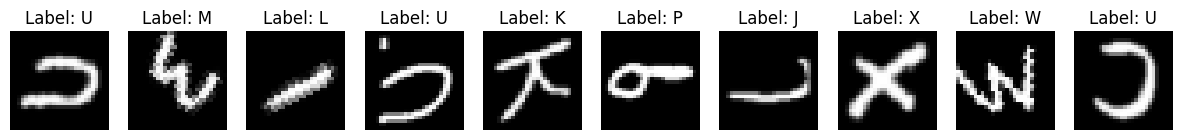

In [ ]:
# FUNCTION TO DISPLAY IMAGES (LETTERS) AND THEIR LABELS
def visualize_samples(dataset, num_samples=10, start_index=280):  # Number of samples decides the number of images displayed
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i, ax in enumerate(axes):
        index = start_index + i
        image, label = dataset[index]   # Numeric label
        letter_label=string.ascii_uppercase[label-1]  # Letter label
        ax.imshow(image.squeeze(), cmap="gray")
        ax.set_title(f"Label: {letter_label}")
        ax.axis("off")
    plt.show()

# DISPALY FIRST 10 IMAGES IN THE LETTERS DATASET
visualize_samples(train_dataset)

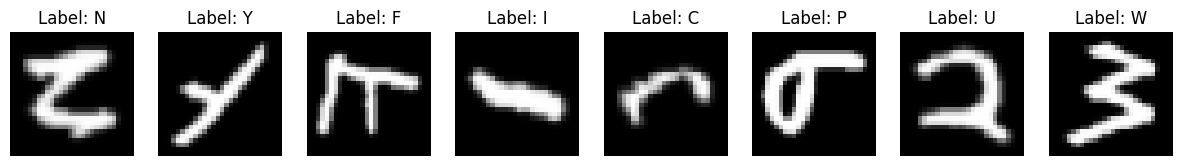

In [ ]:
visualize_samples(combined_dataset, 8, 800)  # Call method after definition
# Updated start index from 0 position to 800

#**CNN ARCHITECTURE**


---

With Transfer Learning

--- ResNet 50 ---

Residual Network - ResNet-50 - is a trained convolutional neural network that is utilizes for image detectiona and classification.

In [ ]:
import torchvision.models as models
import torch.nn as nn

class EMNISTResNet50(nn.Module):
  def __init__ (self, num_classes=26):
    super(EMNISTResNet50, self).__init__()
    # LOADING THE TRAINED MODEL - RESNET-50
    self.model=models.resnet50(pretrained=True)
    # MODYFYING THE FIRST CONVOLUTIONAL LAYER (image_shape)
    self.model.conv1=nn.Conv2d(1,64,kernel_size=7,stride=2,padding=3,bias=False)  # (in_channels, out_channels, kernel_size, stride, padding, bias)

    # FINAL LAYER ADJUSTMENT
    number_of_features=self.model.fc.in_features
    self.model.fc=nn.Linear(number_of_features,num_classes)

  def forward(self, x):
    return self.model(x)

# Enable GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# MODEL INSTANTIATION
model = EMNISTResNet50().to(device)
print(model) # confirmation of the made changes in the model


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


EMNISTResNet50(
  (model): ResNet(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
     

**CNN ARCHITECTURE WITH RESNET-50**

This code implements the Convolutional Neural Network through a transfer learning model, specifically ResNet-50.

ResNet-50 is loaded while making sure that this model is pretrained.
<br><br>
**MODIFICATIONS TO THE CONVOLUTIONAL LAYER**

Even though this model is pretrained, there are some changes mandatory to the first convolutional layer that need to be made.

**"model.conv1=nn.Conv2d(1,64,kernel_size=7,stride=2,padding=3,bias=False) "**

Changes:

**in_channels :** 1 (1 channel for grayscale images in dataset)
Original to the Model:

**out_channel :** 64

**kernel_size :** 7 (7x7 matrix)

**stride :** 2

**padding :** 3 (on the edges)

**bias :** False
<br><br>
**MODIFICATIONS TO THE FINAL FULLY CONNECTED LAYER**

In ResNet-50 the default number of output classes is **1000**.

For EMNIST letter dataset the number of output classes should be changed to **26** [A-Z].

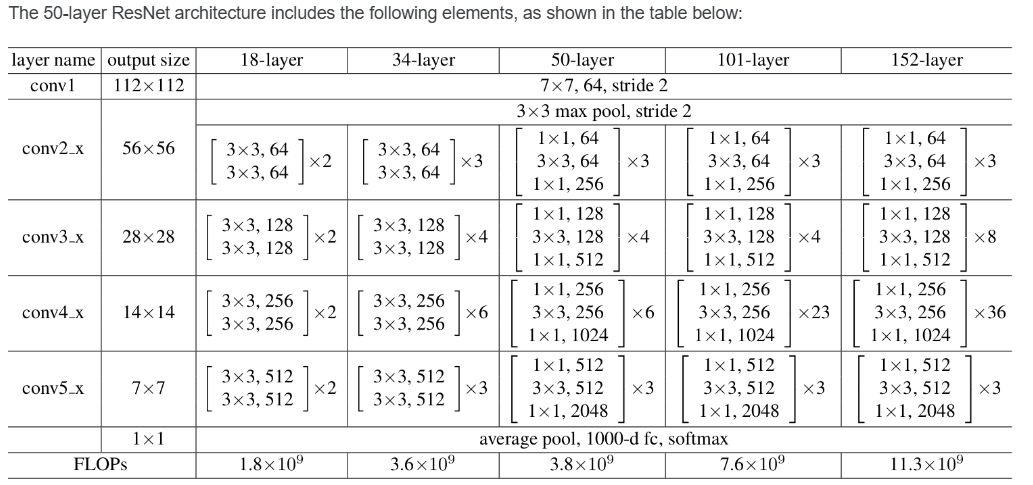

https://www.researchgate.net/figure/ResNet-50-architecture-Example-network-architecture-for-ImageNet_fig2_371517021

# **TRAINING THE MODEL**


---



In [ ]:
pip install torchmetrics

In [ ]:
import torch
import torch.nn as nn
from torchmetrics.classification import MulticlassAccuracy
from tqdm import tqdm
from torch.optim import Adam

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# MOVE MODEL TO APPROPRIATE DEVICE (GPU)
model = EMNISTResNet50().to(device)

# LOSS FUNCTION
criterion = nn.CrossEntropyLoss()
# OPTIMIZATION FUNCTION
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# DEFINE LEARNING RATE SCHEDULER
scheduler= torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma= 0.5)
train_accuracy_metrics= MulticlassAccuracy(num_classes=26).to(device)

# STORING THE TRAINING METRICS (loose & accuracy)
train_losses=[]
train_accuracies=[]

# TRAINING LOOP
epochs=10
for epoch in range(epochs):
  model.train() # Start training
  total_loss=0
  train_accuracy_metrics.reset() # Reset at start of epochs

  batch_iterator = tqdm(train_loader, desc=f"Training Epoch {epoch + 1}/{epochs}")

  for batch in batch_iterator:
    features, labels= batch
    features, labels= features.to(device), labels.to(device)
    labels=torch.clamp(labels,min=0, max=25)
    #FORWARD PASS
    predictions=model(features)
    loss=criterion(predictions, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # UPDATE TRAINING METRICS
    total_loss+=loss.item()
    train_accuracy_metrics.update(predictions, labels)
    batch_iterator.set_postfix({"LOSS": f"{ loss.item():.4f}"} )

  # SET THE SCHDULER
  scheduler.step()
  # TRAINING METRICS
  average_training_loss=total_loss/len(train_loader)
  train_accuracy=train_accuracy_metrics.compute()
  train_losses.append(average_training_loss)
  train_accuracies.append(train_accuracy.item())

  # Print the metrics with flush to avoid overwriting
  print(f"EPOCH {epoch + 1}/{epochs},"
        f" TRAINING LOSS: {average_training_loss:.4f}, TRAINING ACCURACY: {train_accuracy:.4f},")
  print(f"LEARNING RATE : {scheduler.get_last_lr()[0]:.6f}")

  # SAVE THE TRAINED MODEL
  torch.save(model.state_dict(),"EMNIST_ResNet50.pth")
  print("The trained model was saved as EMNIST_ResNet50.pth for later loading.")

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Training Epoch 1/10: 100%|██████████| 3120/3120 [03:37<00:00, 14.36it/s, LOSS=0.3811]


EPOCH 1/10, TRAINING LOSS: 0.7842, TRAINING ACCURACY: 0.7281,
LEARNING RATE : 0.001000
The trained model was saved as EMNIST_ResNet50.pth for later loading.


Training Epoch 2/10: 100%|██████████| 3120/3120 [03:34<00:00, 14.52it/s, LOSS=0.4464]


EPOCH 2/10, TRAINING LOSS: 0.4763, TRAINING ACCURACY: 0.8467,
LEARNING RATE : 0.001000
The trained model was saved as EMNIST_ResNet50.pth for later loading.


Training Epoch 3/10: 100%|██████████| 3120/3120 [03:35<00:00, 14.51it/s, LOSS=0.2495]


EPOCH 3/10, TRAINING LOSS: 0.3874, TRAINING ACCURACY: 0.8719,
LEARNING RATE : 0.001000
The trained model was saved as EMNIST_ResNet50.pth for later loading.


Training Epoch 4/10: 100%|██████████| 3120/3120 [03:34<00:00, 14.54it/s, LOSS=0.2044]


EPOCH 4/10, TRAINING LOSS: 0.3323, TRAINING ACCURACY: 0.8876,
LEARNING RATE : 0.001000
The trained model was saved as EMNIST_ResNet50.pth for later loading.


Training Epoch 5/10: 100%|██████████| 3120/3120 [03:33<00:00, 14.59it/s, LOSS=0.3305]


EPOCH 5/10, TRAINING LOSS: 0.3211, TRAINING ACCURACY: 0.8915,
LEARNING RATE : 0.000500
The trained model was saved as EMNIST_ResNet50.pth for later loading.


Training Epoch 6/10: 100%|██████████| 3120/3120 [03:34<00:00, 14.58it/s, LOSS=0.2647]


EPOCH 6/10, TRAINING LOSS: 0.2604, TRAINING ACCURACY: 0.9102,
LEARNING RATE : 0.000500
The trained model was saved as EMNIST_ResNet50.pth for later loading.


Training Epoch 7/10: 100%|██████████| 3120/3120 [03:34<00:00, 14.55it/s, LOSS=0.3091]


EPOCH 7/10, TRAINING LOSS: 0.2355, TRAINING ACCURACY: 0.9170,
LEARNING RATE : 0.000500
The trained model was saved as EMNIST_ResNet50.pth for later loading.


Training Epoch 8/10: 100%|██████████| 3120/3120 [03:35<00:00, 14.47it/s, LOSS=0.1273]


EPOCH 8/10, TRAINING LOSS: 0.2219, TRAINING ACCURACY: 0.9207,
LEARNING RATE : 0.000500
The trained model was saved as EMNIST_ResNet50.pth for later loading.


Training Epoch 9/10: 100%|██████████| 3120/3120 [03:35<00:00, 14.47it/s, LOSS=0.3200]


EPOCH 9/10, TRAINING LOSS: 0.2216, TRAINING ACCURACY: 0.9215,
LEARNING RATE : 0.000500
The trained model was saved as EMNIST_ResNet50.pth for later loading.


Training Epoch 10/10: 100%|██████████| 3120/3120 [03:34<00:00, 14.54it/s, LOSS=0.2798]


EPOCH 10/10, TRAINING LOSS: 0.2053, TRAINING ACCURACY: 0.9258,
LEARNING RATE : 0.000250
The trained model was saved as EMNIST_ResNet50.pth for later loading.


**LOSS FUNCTION**

Loss function measures how well the program is performing.

-- CrossEntropyLoss() --
<br><br>
**OPTIMIZATION FUNCTION**

The optimizer updates the model's weights during the training phase.

--  Adam --

#**TESTING THE MODEL**


---



Using device: cuda


Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


TEST LOSS: 14.9445
TEST ACCURACY: 0.0408


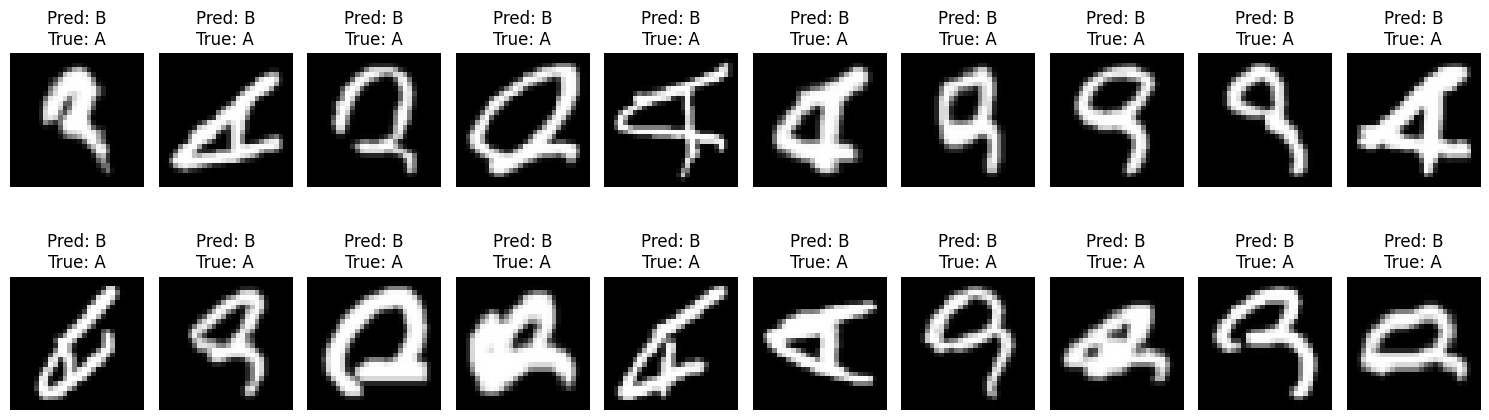

In [ ]:
import matplotlib.pyplot as plt
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import string
from torchmetrics.classification import MulticlassAccuracy

# DEFINE THE DEVICE
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define transforms - using the same transform as in training
train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1736,), (0.3317,))
])

# LOAD THE DATASET
test_dataset = datasets.EMNIST(
    root="data",
    split="letters",
    train=False,
    transform=train_transform,
    download=True
)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Create a custom ResNet50 model for EMNIST - match the architecture used in training
class EMNISTResNet50(nn.Module):
    def __init__(self, num_classes=26):
        super(EMNISTResNet50, self).__init__()
        # Load the pretrained model
        self.model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=True)
        # Modify the first convolutional layer to accept 1 channel (grayscale) instead of 3
        self.model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
        # Modify the final fully connected layer to output 26 classes (letters A-Z)
        self.model.fc = nn.Linear(self.model.fc.in_features, num_classes)

    def forward(self, x):
        return self.model(x)

# LOAD THE TRAINED MODEL
model = EMNISTResNet50().to(device)
# Use map_location to ensure model loads on the correct device
model.load_state_dict(torch.load("EMNIST_ResNet50.pth", map_location=device))
model.eval()

# LOSS FUNCTION AND ACCURACY METRICS
criterion = nn.CrossEntropyLoss()
test_accuracy_metric = MulticlassAccuracy(num_classes=26).to(device)

# Testing loop
total_loss = 0.0
test_accuracy_metric.reset()

# TESTING
with torch.no_grad():
    for features, labels in test_loader:
        features = features.to(device)
        labels = labels.to(device) - 1  # Adjust labels

        # FORWARD PASS
        predictions = model(features)
        loss = criterion(predictions, labels)

        # UPDATE THE METRICS
        total_loss += loss.item()
        test_accuracy_metric.update(predictions, labels)

    test_loss = total_loss / len(test_loader)
    test_accuracy = test_accuracy_metric.compute().item()

    print(f"TEST LOSS: {test_loss:.4f}")
    print(f"TEST ACCURACY: {test_accuracy:.4f}")

# VISUALIZATION
num_samples = 20
samples_indices = range(num_samples)
sample_images = [test_dataset[i][0] for i in samples_indices]
sample_labels = [test_dataset[i][1] for i in samples_indices]
sample_images_tensor = torch.stack(sample_images).to(device)

with torch.no_grad():
    sample_predictions = model(sample_images_tensor)
    sample_prediction_labels = torch.argmax(sample_predictions, dim=1)

plt.figure(figsize=(15, 5))
for i in range(num_samples):
    plt.subplot(2, num_samples // 2, i + 1)
    img = sample_images_tensor[i].cpu().squeeze().numpy()

    # Unnormalize the image
    img = img * 0.3317 + 0.1736

    plt.imshow(img, cmap='gray')

    pred_chr = chr(sample_prediction_labels[i].item() + 65)  # Convert to ASCII letter
    label_chr = chr(sample_labels[i] + 64)  # EMNIST labels start at 1 (A=1)
    plt.title(f"Pred: {pred_chr}\nTrue: {label_chr}")
    plt.axis("off")

plt.tight_layout()
plt.show()